In [190]:
import seaborn as sns
import pandas as pd
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import LabelEncoder
from sklearn . linear_model import LogisticRegression
from sklearn . metrics import accuracy_score

In [191]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

In [192]:
# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

In [193]:
# Initialize the LabelEncoder
le = LabelEncoder()

In [194]:
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

In [195]:
# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [196]:
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis =1)

In [197]:
X = df_filtered.drop(columns=["species"])
X = pd.get_dummies(X, drop_first=True)

In [198]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)


Train the logistic regression model . Here we are using saga solver to learn weights .


In [199]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [200]:
# Predict on the testing data
y_pred = logreg.predict(X_test)

In [201]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy : 1.0
[[ 1.32621379 -1.25548308 -0.12756343 -0.00312309  1.24947049  0.7210066
  -0.55671955 -0.22369071]] [-0.08354891]


In [202]:
random_states = [0, 1, 42, 100, 2025]

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=random_state)
    logreg = LogisticRegression(solver='saga')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy :", accuracy)     

Accuracy : 0.6511627906976745
Accuracy : 0.7209302325581395
Accuracy : 0.5813953488372093
Accuracy : 0.6744186046511628
Accuracy : 0.6511627906976745


c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hewaj\anaconda3\envs\pr\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg_saga_scaled = LogisticRegression(solver="saga")
logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)
print("Accuracy (Saga with scaling): ", accuracy_saga_scaled)

logreg_liblinear_scaled = LogisticRegression(solver="liblinear")
logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)
print("Accuracy (liblinear with scaling): ", accuracy_liblinear_scaled)

Accuracy (Saga with scaling):  1.0
Accuracy (liblinear with scaling):  1.0


In [204]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs

In [205]:
# Generate synthetic data
np.random.seed(0)
centers = [[ -5 , 0] , [5 , 1.5]]

In [206]:
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5 , 0.5], [ -0.5 , 1.5]]
X = np.dot(X, transformation)

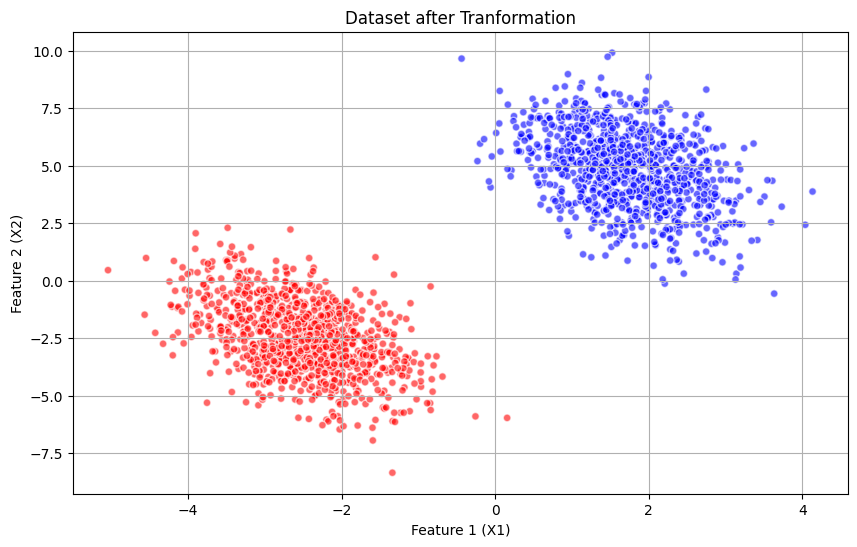

In [207]:
plt.figure(figsize=(10, 6))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', s=30)
plt.title('Dataset after Tranformation')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.grid(True)
plt.show()

In [208]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def batch_gradient_descent(X, y, lr, iter):
    X_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    weights = np.zeros((X_intercept.shape[1], 1))
    losses = []

    for i in range(iter):
        z = np.dot(X_intercept, weights)
        y_pred = sigmoid(z)

        loss = log_loss(y, y_pred)
        losses.append(loss)

        gradient = (1 / X_intercept.shape[0]) * np.dot(X_intercept.T, (y_pred - y))

        weights -= gradient * lr

        print(f"Iteration {i+1}/{iter}: Loss = {loss:.5f}")

    return weights, losses

In [209]:
lr = 0.06
iterations = 20

y = y.reshape(-1, 1)

weights_bgd, losses_bgd = batch_gradient_descent(X, y, lr, iterations)

print('\nLearned weights:', weights_bgd)
print('Final loss:', losses_bgd[-1])

Iteration 1/20: Loss = 0.69315
Iteration 2/20: Loss = 0.46628
Iteration 3/20: Loss = 0.34864
Iteration 4/20: Loss = 0.27959
Iteration 5/20: Loss = 0.23449
Iteration 6/20: Loss = 0.20271
Iteration 7/20: Loss = 0.17904
Iteration 8/20: Loss = 0.16069
Iteration 9/20: Loss = 0.14602
Iteration 10/20: Loss = 0.13399
Iteration 11/20: Loss = 0.12395
Iteration 12/20: Loss = 0.11541
Iteration 13/20: Loss = 0.10807
Iteration 14/20: Loss = 0.10168
Iteration 15/20: Loss = 0.09605
Iteration 16/20: Loss = 0.09107
Iteration 17/20: Loss = 0.08662
Iteration 18/20: Loss = 0.08261
Iteration 19/20: Loss = 0.07899
Iteration 20/20: Loss = 0.07570

Learned weights: [[-0.03696673]
 [ 0.43182753]
 [ 0.56471877]]
Final loss: 0.07569648059369857


In [210]:
def newton_method(X, y, iter):
    X_intercept = np.c_[np.ones((X.shape[0], 1)), X]
    m, n = X_intercept.shape

    weights = np.zeros((n, 1))
    losses = []

    for i in range(iter):
        z = np.dot(X_intercept, weights)
        y_pred = sigmoid(z)

        loss = log_loss(y, y_pred)
        losses.append(loss)

        gradient = (1/m) * np.dot(X_intercept.T, (y_pred - y))

        R_diag = (y_pred * (1 - y_pred)).flatten()
        R = np.diag(R_diag)
        H = (1/m) * np.dot(X_intercept.T, np.dot(R, X_intercept))

        H_inv = np.linalg.inv(H)
        weights -= np.dot(H_inv, gradient)

        print(f'Iteration {i+1}/{iter}: Loss = {loss:.5f}')

    return weights, losses

weights_newton, losses_newton = newton_method(X, y, iterations)

print('\nLearned weights (Newton method):', weights_newton)
print('Final loss (Newton method):', losses_newton[-1])

Iteration 1/20: Loss = 0.69315
Iteration 2/20: Loss = 0.14522
Iteration 3/20: Loss = 0.05276
Iteration 4/20: Loss = 0.02031
Iteration 5/20: Loss = 0.00800
Iteration 6/20: Loss = 0.00320
Iteration 7/20: Loss = 0.00130
Iteration 8/20: Loss = 0.00054
Iteration 9/20: Loss = 0.00022
Iteration 10/20: Loss = 0.00009
Iteration 11/20: Loss = 0.00004
Iteration 12/20: Loss = 0.00002
Iteration 13/20: Loss = 0.00001
Iteration 14/20: Loss = 0.00000
Iteration 15/20: Loss = 0.00000
Iteration 16/20: Loss = 0.00000
Iteration 17/20: Loss = 0.00000
Iteration 18/20: Loss = 0.00000
Iteration 19/20: Loss = 0.00000
Iteration 20/20: Loss = 0.00000

Learned weights (Newton method): [[-2.93259517]
 [10.56207842]
 [ 4.32766252]]
Final loss (Newton method): 7.729078903566038e-09


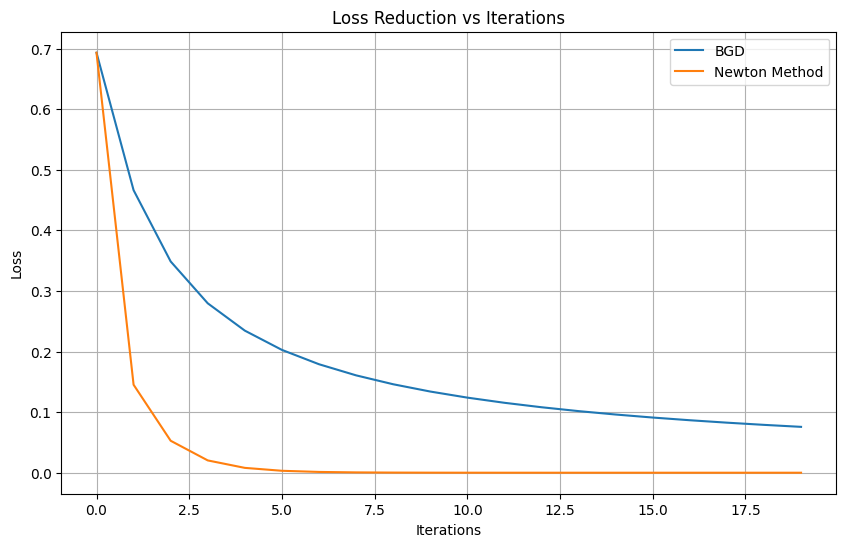

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), losses_bgd, label='BGD')
plt.plot(range(iterations), losses_newton, label='Newton Method')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [212]:
np.random.seed(0)
new_centers = [[2, 2] , [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=new_centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

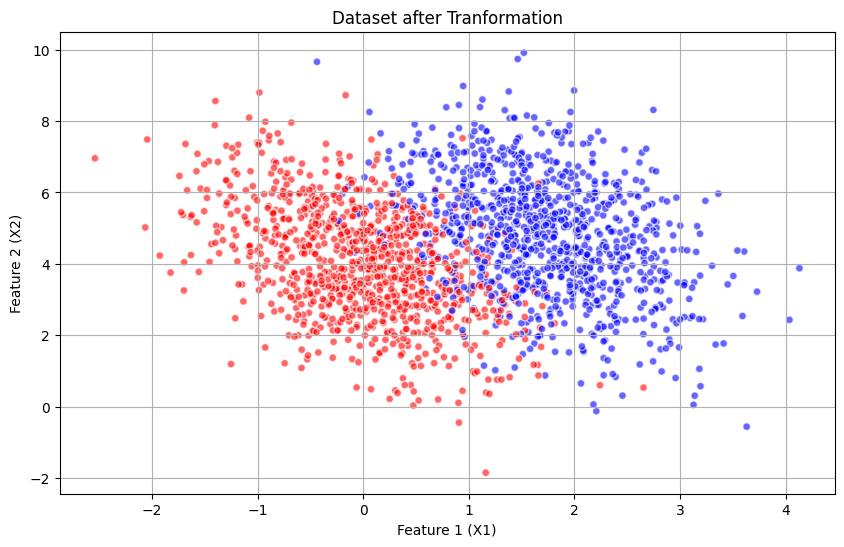

In [213]:
plt.figure(figsize=(10, 6))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', s=30)
plt.title('Dataset after Tranformation')
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')
plt.grid(True)
plt.show()

Iteration 1/20: Loss = 0.69315
Iteration 2/20: Loss = 0.68041
Iteration 3/20: Loss = 0.67001
Iteration 4/20: Loss = 0.66079
Iteration 5/20: Loss = 0.65224
Iteration 6/20: Loss = 0.64414
Iteration 7/20: Loss = 0.63641
Iteration 8/20: Loss = 0.62899
Iteration 9/20: Loss = 0.62186
Iteration 10/20: Loss = 0.61499
Iteration 11/20: Loss = 0.60839
Iteration 12/20: Loss = 0.60202
Iteration 13/20: Loss = 0.59588
Iteration 14/20: Loss = 0.58997
Iteration 15/20: Loss = 0.58426
Iteration 16/20: Loss = 0.57876
Iteration 17/20: Loss = 0.57345
Iteration 18/20: Loss = 0.56832
Iteration 19/20: Loss = 0.56336
Iteration 20/20: Loss = 0.55858

Learned weights: [[-0.05589403]
 [ 0.39806992]
 [-0.01130775]]
Final loss: 0.5585774703977295


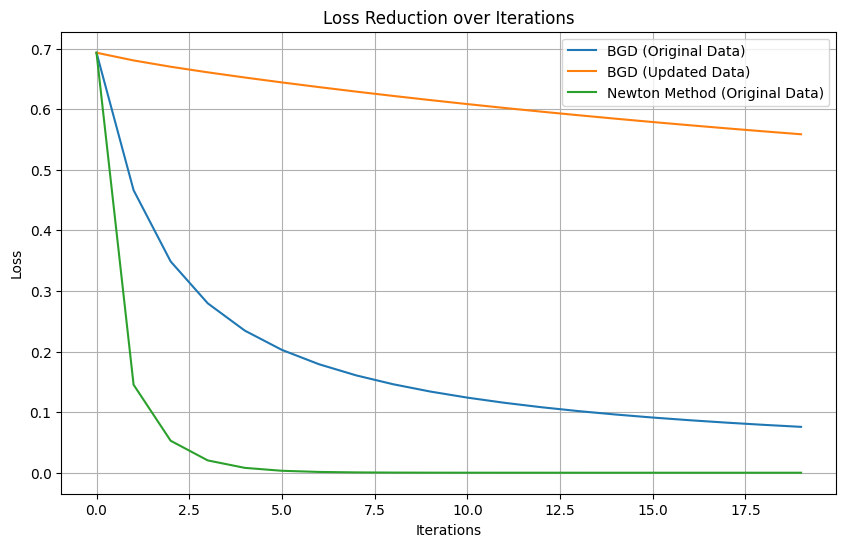

In [214]:
y = y.reshape(-1, 1)
weights, losses = batch_gradient_descent(X, y, lr, iterations)

print("\nLearned weights:", weights)
print("Final loss:", losses[-1])

plt.figure(figsize=(10,6))
plt.plot(range(iterations), losses_bgd, label='BGD (Original Data)')
plt.plot(range(iterations), losses, label='BGD (Updated Data)')
plt.plot(range(iterations), losses_newton, label='Newton Method (Original Data)')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Reduction over Iterations')
plt.legend()
plt.grid(True)
plt.show()